In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("Friends_Script.xlsx")

In [3]:
df.head()

,~~Output Dialog~~,~~Respect of User (OD)~~,~~Input Dialog~~
0,Top of the world? Dock of the bay? I'm out.,5,What am I sitting on?
1,"Oh! Look at that, time's up! My turn!",7,I can't believe we've never done this before!...
2,"Wow! Listen, we had a good run. What was it?...",6,"Chandler!!! Chandler!!! Chandler, I saw what..."
3,Hey!,8,Hey!
4,Okay.,5,"Okay, pick a card."


In [4]:
#clean data
df.columns = ["A", "B", "C"]

In [5]:
data1 = pd.Series(df["A"])
data2 = pd.Series(df["C"])
data1.head()
data2.head()

0                               What am I sitting on? 
1     I can't believe we've never done this before!...
2     Chandler!!! Chandler!!!  Chandler, I saw what...
3                                                Hey! 
4                                  Okay, pick a card. 
Name: C, dtype: object

In [50]:
data = data1.append(data2, ignore_index = True) # append second column to end of first in the form of a pandas series and ignore the index so it creates new index with correct length
data.index

RangeIndex(start=0, stop=15254, step=1)

In [58]:
# lower case everything
data = [str.lower(item) for item in data]
data = pd.Series(data)
data.head()

0        top of the world? dock of the bay?  i'm out. 
1               oh! look at that, time's up! my turn! 
2      wow! listen, we had a good run. what was it?...
3                                                hey! 
4                                              okay.  
dtype: object

In [347]:
import re
# create lists of bad and good words
bad_words = ["hottie", "sexy", "exercis", "waist", "busty", "fat ", "fatso ", "fatty", "big boned", "big-boned", "flab", "binge", " pig ", "piggy", "pig out", "lard ", "chunky", "weight", "skinny", " thin ", "healthy", "athletic", "saggy"]
good_words = ["sexy", "healthy", "thin", "skinny", "waist", "exercis"]


In [348]:
# create patterns for each item in lists of good and bad words
bad_patterns = [re.compile(x) for x in bad_words]
good_patterns = [re.compile(x) for x in good_words]

In [349]:
# create function that searches for each of the patterns and returns a ghost list with all the strings where it found at least one of the patterns
bad_ghost = []
def present_bad(string):
    for i in bad_patterns:
        if i.search(string) != None:
            bad_ghost.append(string)
good_ghost = []
def present_good(string):
    for i in good_patterns:
        if i.search(string) != None:
            good_ghost.append(string)

In [350]:
#apply the functions to the full data
data.apply(present_bad)
data.apply(present_good)

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
15224    None
15225    None
15226    None
15227    None
15228    None
15229    None
15230    None
15231    None
15232    None
15233    None
15234    None
15235    None
15236    None
15237    None
15238    None
15239    None
15240    None
15241    None
15242    None
15243    None
15244    None
15245    None
15246    None
15247    None
15248    None
15249    None
15250    None
15251    None
15252    None
15253    None
Length: 15254, dtype: object

In [352]:
# remove duplicate entries
bad_ghost = list(dict.fromkeys(bad_ghost))
bad_ghost[:5]

[' ahh, hotties of the paleontology department, there\x92s a big selling calendar, eh? ',
 " woah, woah, i've put on a little weight? ",
 ' well, we\'re talking about sperm donors and zack may be the guy! i mean, look, he\'s intelligent, he\'s healthy, he\'s athletic, i mean, he is "spermtastic"! ',
 ' ah, you\x92re still just a little fat girl inside aren\x92t you?  ',
 ' nah, monica\x92s watching some cooking show. come on, i don\x92t want to miss when they were skinny. ']

In [385]:
match = [re.search(pattern, string) for pattern in bad_patterns for string in bad_ghost] # create a "match" list that goes through each item in bad_ghost and returns the match object found 
matched_words = [i.group(0) for i in match if i != None] # if there is a match object, return the actual word that was matched
matched_words

['hottie',
 'hottie',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'sexy',
 'waist',
 'waist',
 'waist',
 'waist',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fat ',
 'fatty',
 'flab',
 ' pig ',
 'piggy',
 'piggy',
 'chunky',
 'weight',
 'weight',
 'weight',
 'weight',
 'weight',
 'skinny',
 'skinny',
 ' thin ',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'athletic',
 'saggy']

In [393]:
# create tally_df with a count of how many times each word in bad_words was matched in bad_ghost
tally_df = pd.DataFrame({"Word": i, "Count": matched_words.count(i)} for i in bad_words)
tally_df

,Count,Word
0,2,hottie
1,11,sexy
2,0,exercis
3,4,waist
4,0,busty
5,11,fat
6,0,fatso
7,1,fatty
8,0,big boned
9,0,big-boned


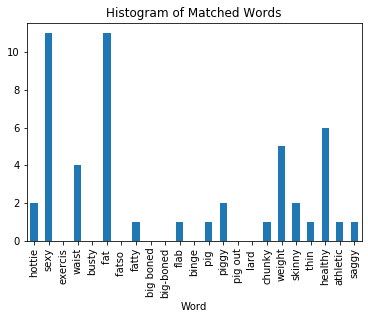

In [396]:
tally_df.plot.bar(x = "Word", y = "Count", title = "Histogram of Matched Words", legend = False);

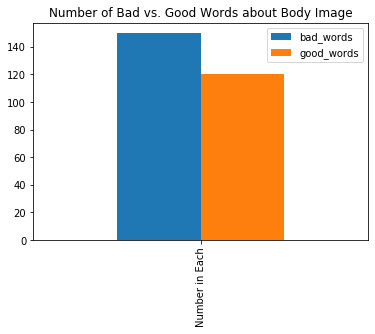

In [238]:
import matplotlib.pyplot as plt
all_ghosts.plot(type = 'bar', x = 'title = "Number of Bad vs. Good Words about Body Image");

## From final project - unused code

In [ ]:
alt_script = soup.find_all('font')
del alt_script[:4]
alt_script
list_script = [i.get_text() for i in alt_script]
list_script
list_script = pd.Series(list_script)
Script = open("Script.txt", "w")
n = Script.write(script)
Script.close()